##CSV file containing city data for the Citrics Project:
[Github Repo](https://github.com/Lambda-School-Labs/Labs27-C-Citrics-DS/blob/main/project/citydata.csv)

In [1]:
#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.printoptions(suppress=False)

the CSV file is locally on my computer(for now, will update the github repo to have the CSV file)

In [3]:
df = pd.read_csv('/content/citydata.csv')

In [4]:
df.head()

,city_id,city,state,state_abbrev,pop,age,household,individual,house,rent,COLI,pop_hist,ziplist,pop_density,timezone,counties,density_mi_km_sqared,wiki_img_url,FIPS,GNIS,website,latitude,longitude,jhcovid,home_hist,lat,lon,coord_pair,weather_hist,income_hist,ACA_status
0,0,Phenix City,Alabama,AL,36219,32.6,41063,23236,131994,795,83.8,"{""city"":""Phenix City, Alabama"",""POP_2010_censu...",['36867-36870'],"[1710.0, 251.0, 773.0]","['UTC-6', 'CST', 'CST']",Russell Lee,"['1,303.15', '503.15']",https://upload.wikimedia.org/wikipedia/commons...,01-59472,0155193,http://www.phenixcityal.us,32.470976,-85.000765,NaN,"{""2010_01_31"":101661.0,""2010_02_28"":101757.0,""...",32.47,-85.00,"('32.47', '-85.00')",NaN,"{""2010_Med_Hou_Inc"":""40474"",""2010_Med_Ind_Inc""...",Not Adopted
1,1,Vestavia Hills,Alabama,AL,34291,40.0,101429,56238,387921,1068,89.3,"{""city"":""Vestavia Hills, Alabama"",""POP_2010_ce...","['35216', '35226', '35243', '35242']",[16.0],"['UTC-6', 'Central', 'CST']",Jefferson Shelby,"['1,723.23', '665.35']",https://upload.wikimedia.org/wikipedia/commons...,01-78552,0153841,http://vhal.org/,33.448799,-86.787949,NaN,"{""2010_01_31"":325895.0,""2010_02_28"":327717.0,""...",33.44,-86.78,"('33.44', '-86.78')",NaN,"{""2010_Med_Hou_Inc"":""40474"",""2010_Med_Ind_Inc""...",Not Adopted
2,2,Apache Junction,Arizona,AZ,40538,53.9,48834,24369,174477,806,94.3,"{""city"":""Apache Junction, Arizona"",""POP_2010_c...",['85119–85120'],"[None, 482.0, 1577.0, None, None]","['UTC-7', 'MST', 'time']",Maricopa Pinal,"['1,213.85', '468.68']",https://upload.wikimedia.org/wikipedia/commons...,04-02830,25702,ajcity.net,33.415048,-111.549577,NaN,"{""2010_01_31"":122062.0,""2010_02_28"":122284.0,""...",33.41,-111.54,"('33.41', '-111.54')","{""Jan_precip"":1.31,""Jan_temp"":53.5,""Feb_precip...","{""2010_Med_Hou_Inc"":""46789"",""2010_Med_Ind_Inc""...",Adopted
3,3,Bullhead City,Arizona,AZ,40252,53.0,40566,24404,135165,740,87.6,"{""city"":""Bullhead City, Arizona"",""POP_2010_cen...",[],"[86.0, 877.0]","['UTC-7', 'MST', 'MST']",Mohave,"['688.60', '265.87']",https://upload.wikimedia.org/wikipedia/commons...,04-08220,2409936,http://www.bullheadcity.com/,35.147777,-114.568298,"{""Combined_Key"":""Mohave, Arizona, US"",""2020_01...","{""2010_01_31"":140626.0,""2010_02_28"":140158.0,""...",35.14,-114.56,"('35.14', '-114.56')","{""Jan_precip"":1.67,""Jan_temp"":54.1,""Feb_precip...","{""2010_Med_Hou_Inc"":""46789"",""2010_Med_Ind_Inc""...",Adopted
4,4,Casa Grande,Arizona,AZ,55477,37.3,53312,23080,188388,905,93.6,"{""city"":""Casa Grande, Arizona"",""POP_2010_censu...","['85122', '85130', '85193']","[1018.0, None, 19.0, 89.0, None]","['UTC−7', 'MST', 'DST']",Pinal,"['530.01', '204.64']",https://upload.wikimedia.org/wikipedia/commons...,04-10530,24269,http://www.casagrandeaz.gov,32.879502,-111.757352,"{""Combined_Key"":""Pinal, Arizona, US"",""2020_01_...","{""2010_01_31"":115723.0,""2010_02_28"":116285.0,""...",32.87,-111.75,"('32.87', '-111.75')","{""Jan_precip"":0.95,""Jan_temp"":50.8,""Feb_precip...","{""2010_Med_Hou_Inc"":""46789"",""2010_Med_Ind_Inc""...",Adopted


In [5]:
df.columns

Index(['city_id', 'city', 'state', 'state_abbrev', 'pop', 'age', 'household',
       'individual', 'house', 'rent', 'COLI', 'pop_hist', 'ziplist',
       'pop_density', 'timezone', 'counties', 'density_mi_km_sqared',
       'wiki_img_url', 'FIPS', 'GNIS', 'website', 'latitude', 'longitude',
       'jhcovid', 'home_hist', 'lat', 'lon', 'coord_pair', 'weather_hist',
       'income_hist', 'ACA_status'],
      dtype='object')

##Columns Description:


- city_id: *Unique identifier for each city*
- city: *City name*
- state: *State's Complete name*
- state_abbrev: *State Abbreviationn code*
- pop: *Population of the city*
- age: *Median age of the population*
- household: *Median Household Income*
- individual: *Median Individual Income*
- house: *Median House Price*
- rent: *Median Rent Price*
- COLI: *Cost Of Living Index*
- pop_hist: *Historical Population history in JSON format*
- ziplist: *List of all available Zip Codes in the city*
- pop_density: *Population density*
- timezone: *Available Timezones*
- counties: *Available counties*
- density_mi_km_sqared: *TODO*
- wiki_img_url: *Image URL of the city*
- FIPS: *Federal Information Processing standard code for the city city*
- GNIS: *Geographic Names Information System Code for each city*
- website: *Website of the city*
- latitude: *Latitude coordinates of each city*
- longitud: *Longitude coordinates of each city*
- jhcovid: *Covid-19 Data for each city from John Hopkins in JSON format*
- home_hist: *Historical Home Price Data for each city in JSON format*
- lat: *Latitude in 2 decimal points*
- lon:  *Longitude in 2 Decimal Points*
- coord_pair: *Latitude and longitude pairs as Tuples*
- weather_hist: *Weather historical Data for each city in JSON format*
- income_hist: *Median Income history for each city in JSON format*
- ACA_status: *Afordable Care act adoption for each city*




In [6]:
!pip install dtale

     |████████████████████████████████| 7.7MB 2.4MB/s 
     |████████████████████████████████| 645kB 47.1MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 194kB 40.8MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 1.8MB 39.8MB/s 
     |████████████████████████████████| 1.0MB 45.1MB/s 
     |████████████████████████████████| 3.4MB 44.9MB/s 
     |████████████████████████████████| 194kB 42.8MB/s 
     |████████████████████████████████| 1.8MB 29.8MB/s 
     |████████████████████████████████| 358kB 40.6MB/s 
  Created wheel for dash-daq: filename=dash_daq-0.5.0-cp36-none-any.whl size=669704 sha256=ba3196567ace0b031b7f455ef8ddb2558cf7f2bd57cc647c18f0a1244979f8f0
  Stored in directory: /root/.cache/pip/wheels/1c/9c/f7/84731716eaa9fc952cdbdd1f87df3ca9b8805c317c609efcd6
  Created wheel for dash: filename=dash-1.16.3-cp36-none-any.whl size=82

## Dtale Library for EDA !

In [7]:
import dtale
import dtale.app as dtale_app

In [8]:
dtale_app.USE_COLAB = True

In [9]:
report = dtale.show(df)

2020-10-20 16:13:22,571 - INFO     - NumExpr defaulting to 2 threads.


# When you click on the link a new tab will open and you should see something like this: 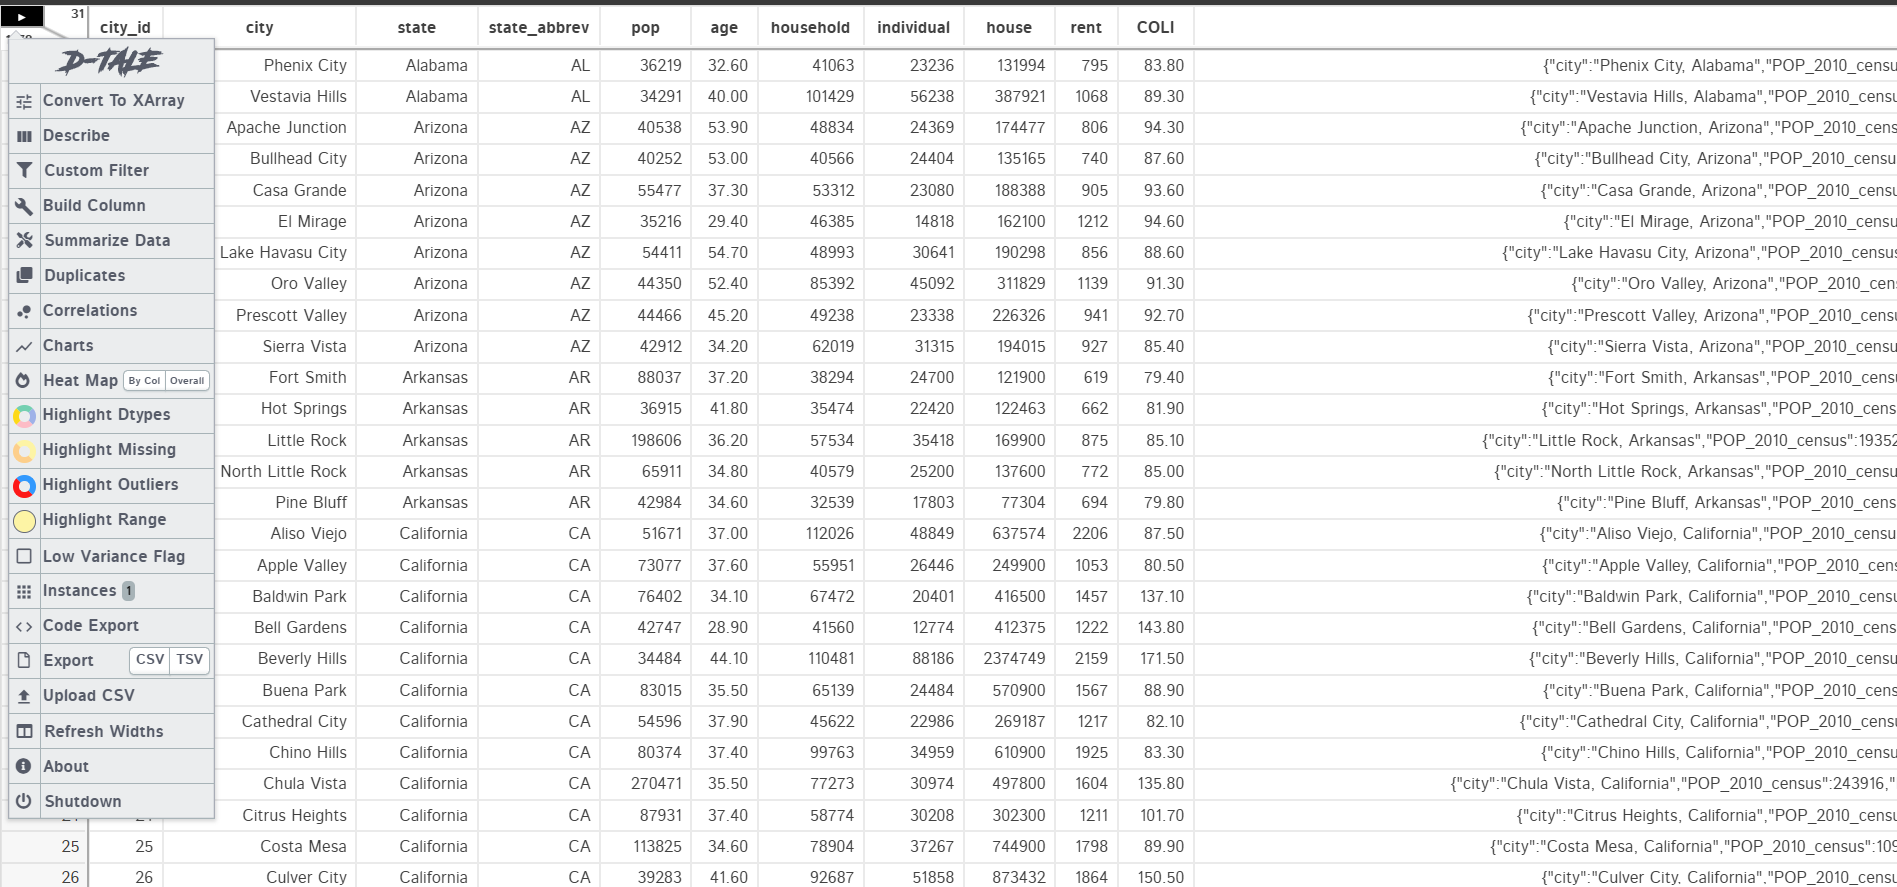

In [10]:
report #click on the link below to see all of the details

https://pq2p6ainiad-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

## affotdable care act Adoption distribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



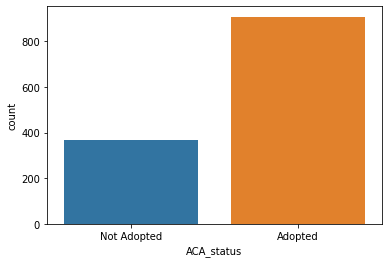

In [11]:
sns.countplot(df['ACA_status']);

## Individual Income Distribution

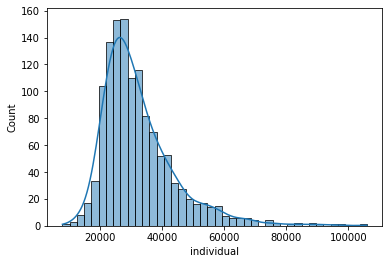

In [12]:
sns.histplot(data=df,x='individual', kde=True);

# Individual Income Distribution based on Affordable care act Adoption
notes: According to the graph, cities with a lower individual median income are adopting the ACA at a lower rate, maybe there is a confounding variable? population? maybe? i'll have to come back to this

NOTE: Median individual income is $29594.5 (this dataframe only includes cities with a population of 30,000 habitants, just for context)


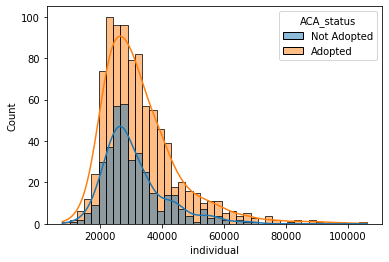

In [13]:
sns.histplot(data=df,x='individual', kde=True, hue='ACA_status');

In [14]:
np.median(df['individual'])

29594.5

# Household Income distribution

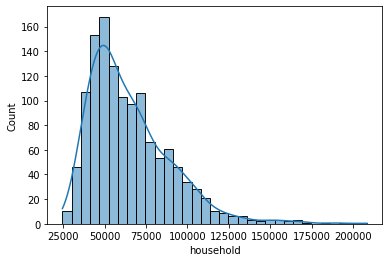

In [15]:
sns.histplot(data=df,x='household', kde=True);

In [16]:
np.median(df['household'])

59427.5

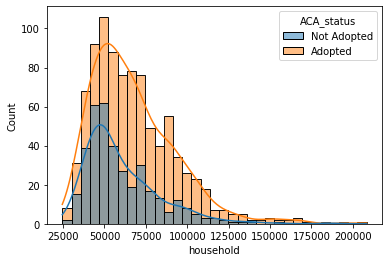

In [17]:
# just for curiosity, lets see whats is the distribution based on ACA adoption...
sns.histplot(data=df,x='household', kde=True, hue='ACA_status');

Notes: Intresting... same result as in individual median income...

# Boxplot Showing individual median income by state

note: California seems to be the best state to for single individuals looking for a high income...
however cost of living index is higher in these cities 

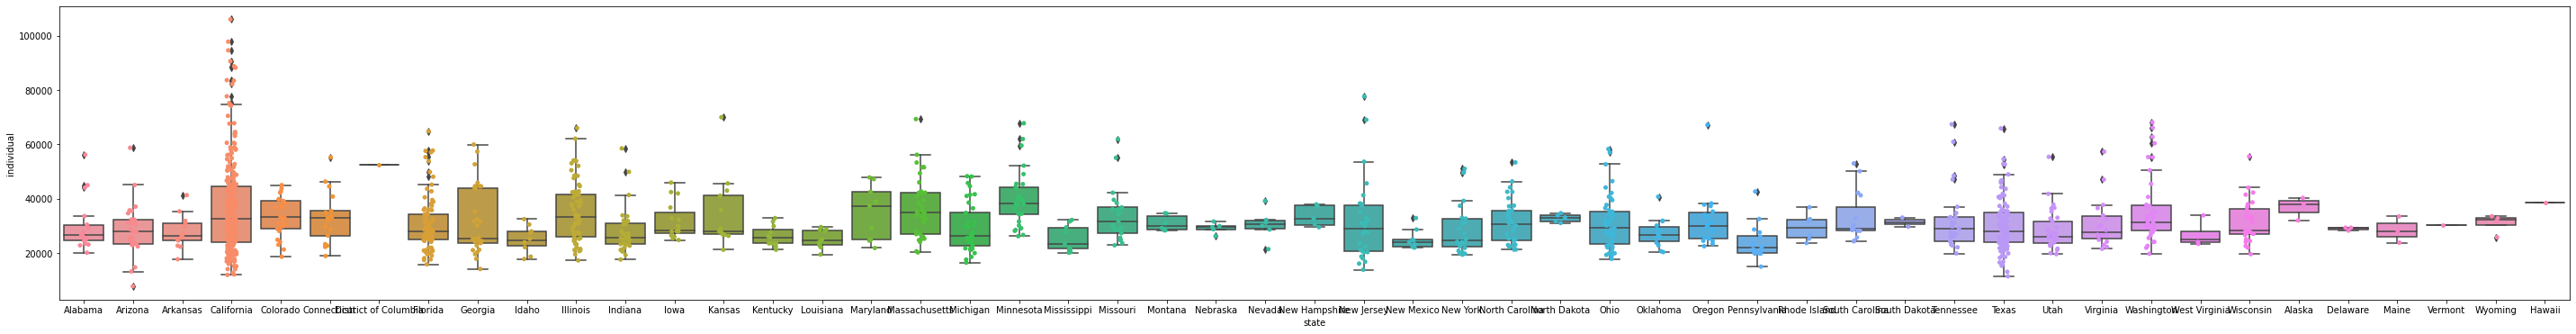

In [18]:
plt.figure(figsize=(50,6))
sns.boxplot(data=df,x='state', y='individual');
sns.stripplot(data=df,x='state', y='individual');

# COST OF LIVING INDEX BY STATE 

note: the higher the median income the higher the coli gets

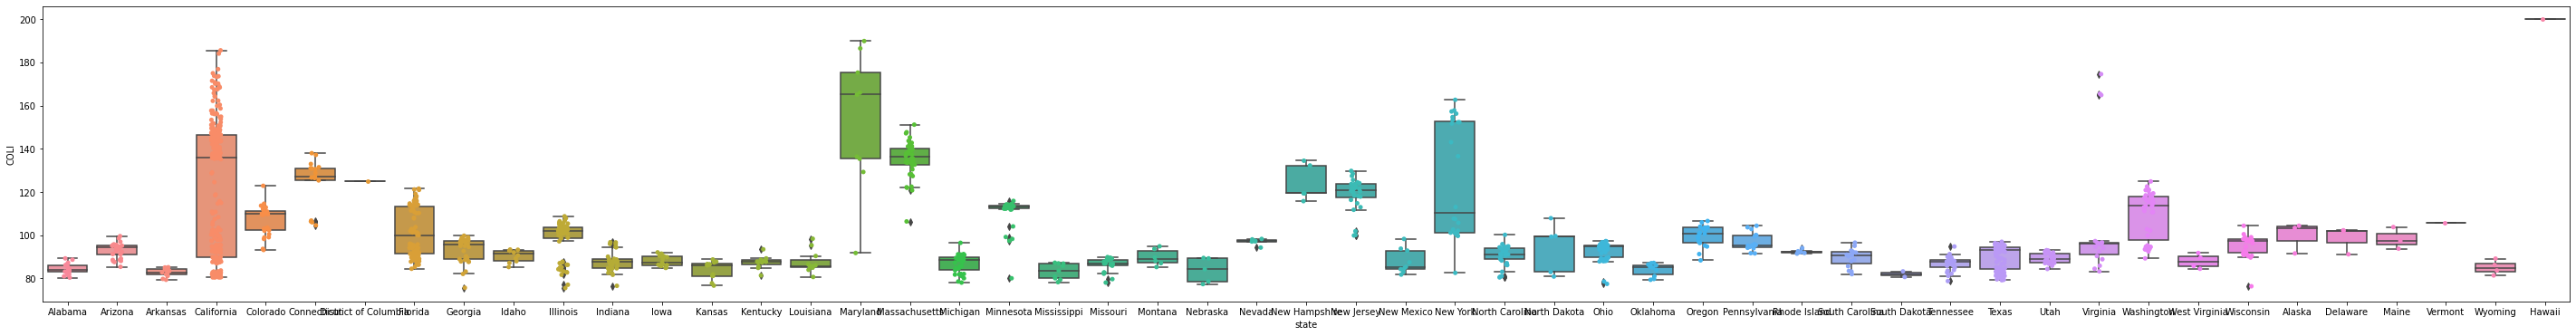

In [19]:
plt.figure(figsize=(50,6))
sns.boxplot(data=df,x='state', y='COLI');
sns.stripplot(data=df,x='state', y='COLI');

# Cost of living index and rent scatter plot

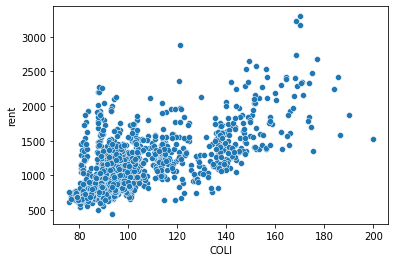

In [20]:
sns.scatterplot(data=df,x='COLI', y='rent');

## Age and Cost of living Index scatter plot

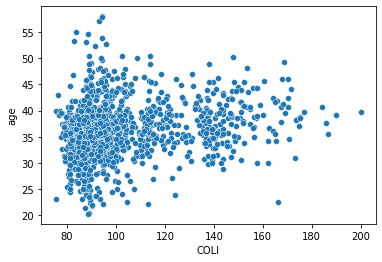

In [21]:
sns.scatterplot(data=df,x='COLI', y='age');

# Todo: get a USA map showing the cities and states with the highest COLI

In [22]:
import plotly.express as px

# fig = px.choropleth(df, locations='coord_pair', color='COLI',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            scope="usa",
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

# Median Age and individual income scatterplot

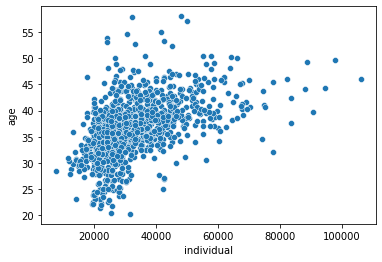

In [23]:
sns.scatterplot(data=df,x='individual', y='age');

# Seaborn Pairplot withall the numerical features in the dataframe

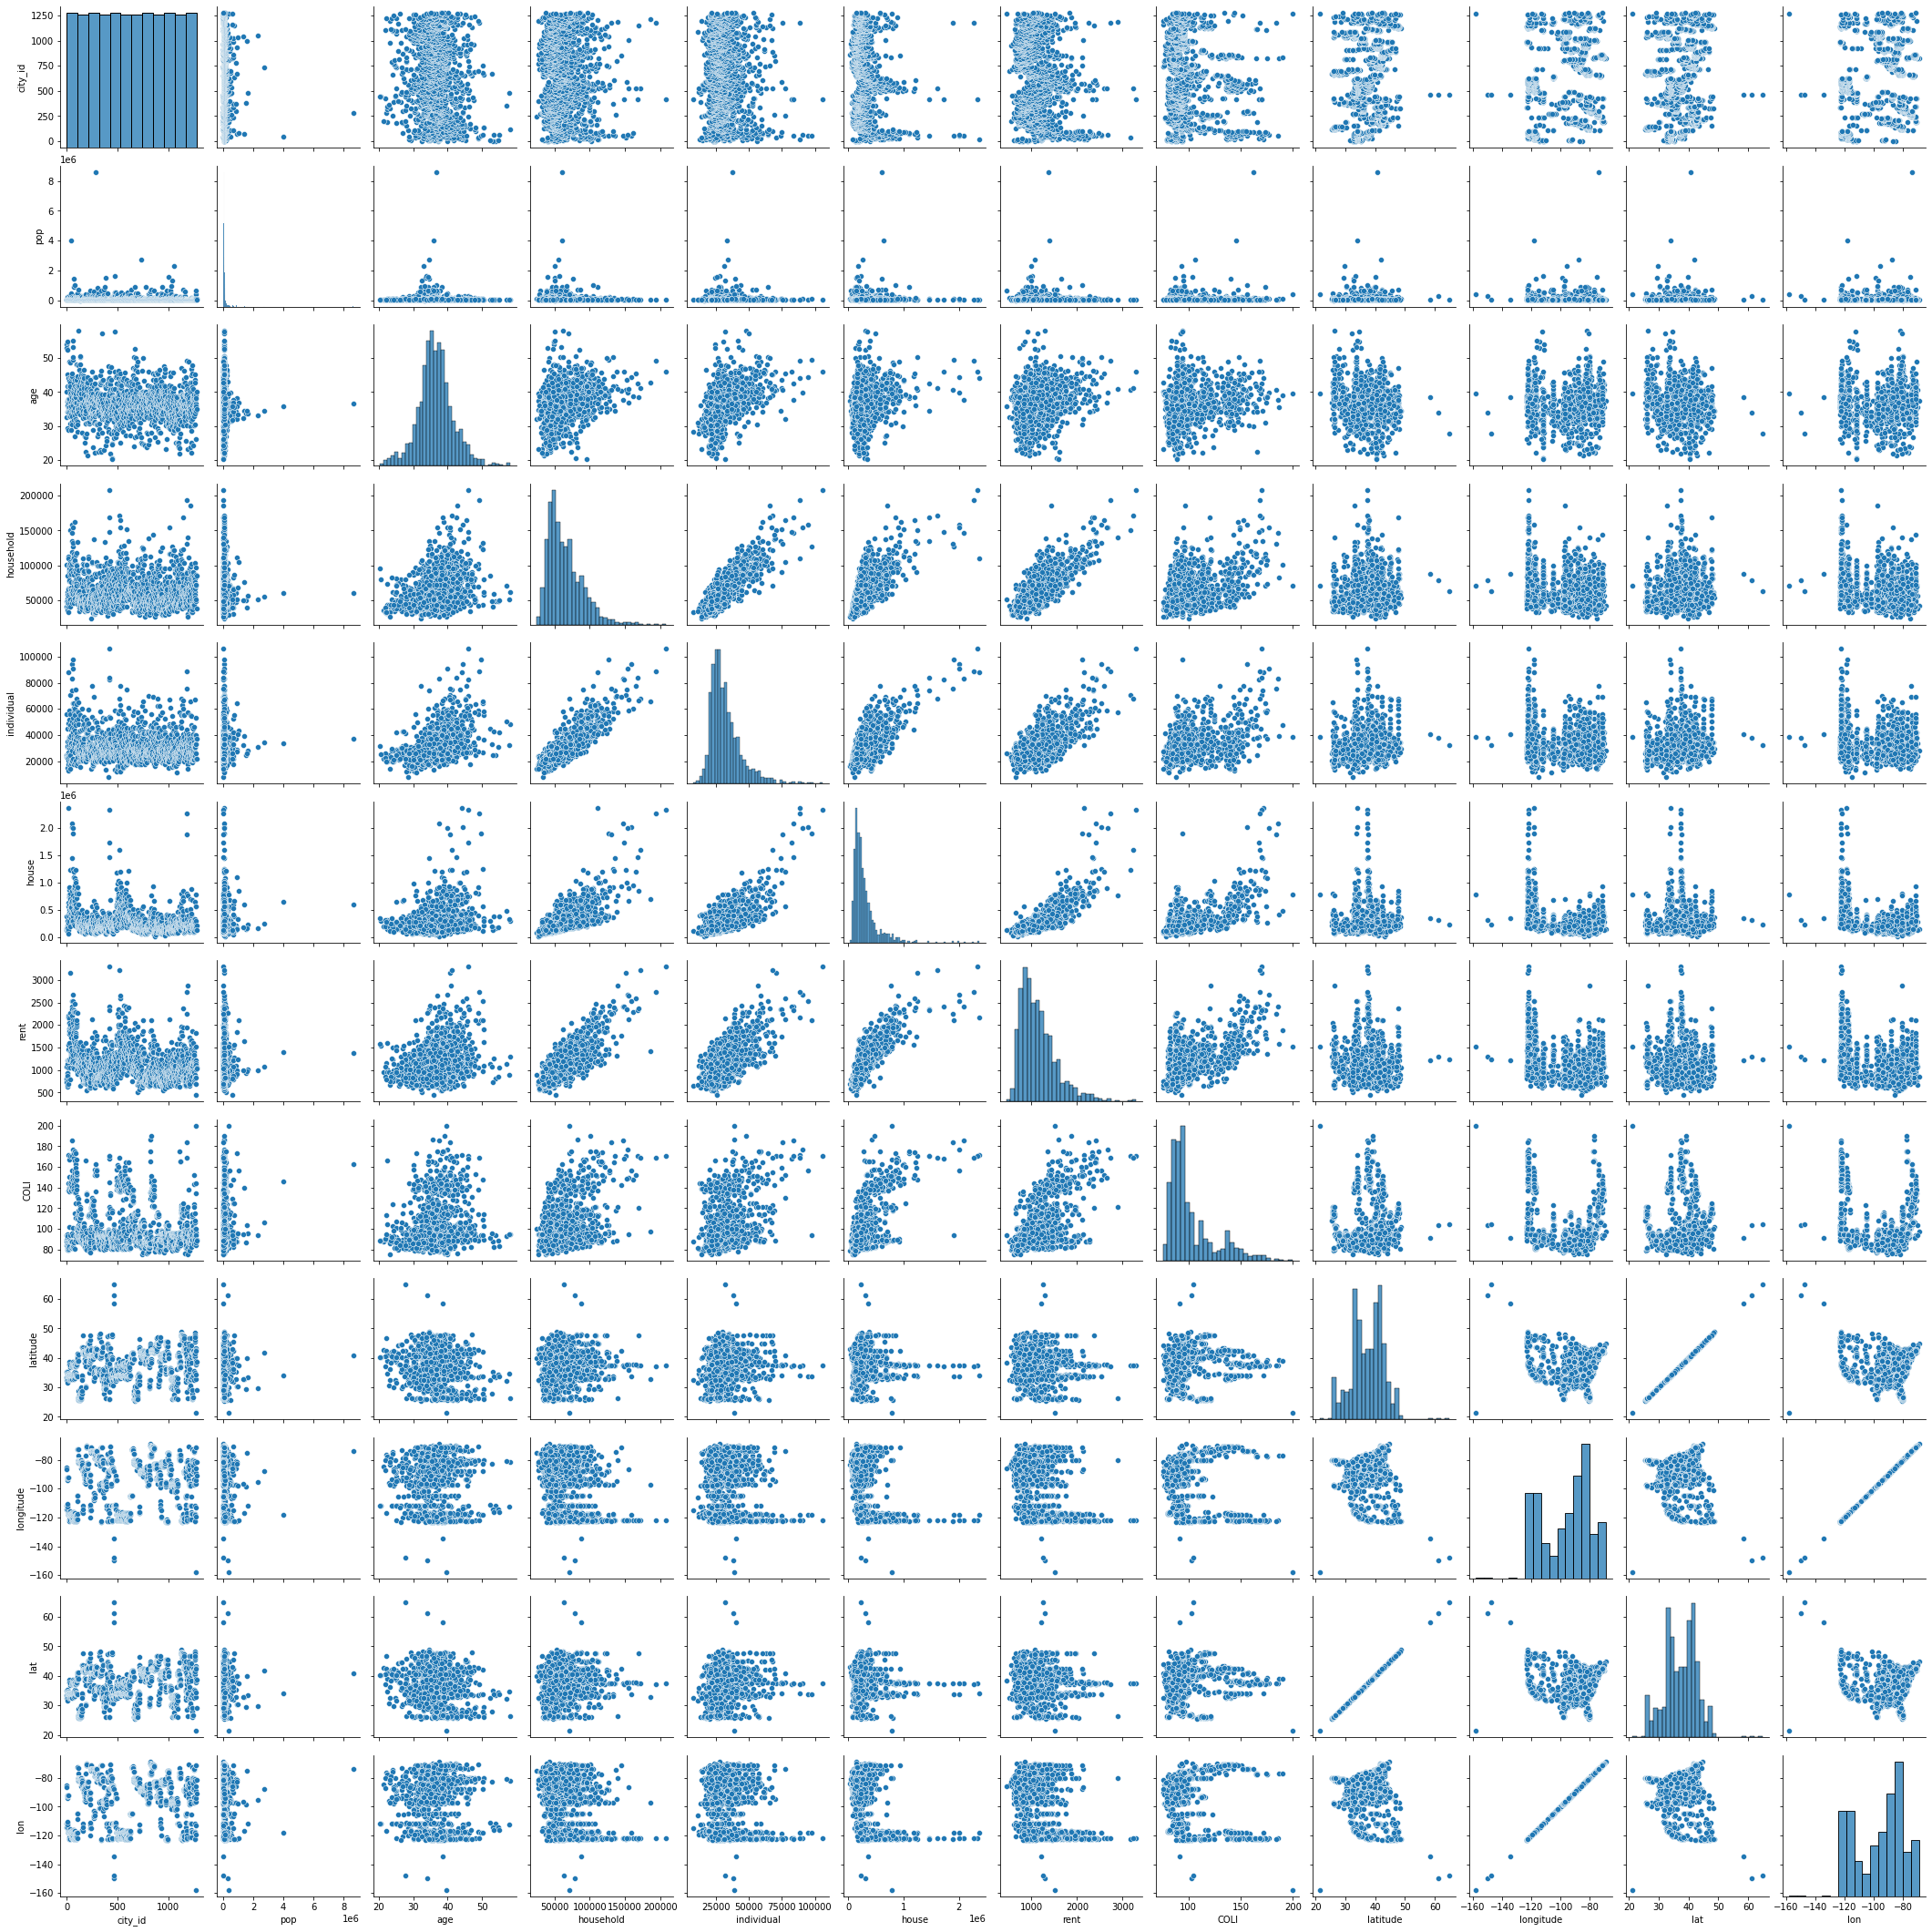

In [24]:
sns.pairplot(df);

## Feature extraction for modeling:
    features we are trying to retrieve:
    - average or median precipitation for each city
    - average or median temperature for each city

In [27]:
import json

In [28]:
def json_dataframe(column):
    '''
    this function will convert any of the columns that are formatted as json
    and return a pandas DataFrame Object

    arguments:
        column: Pandas series object
    returns:
        a pandas dataframe    
    
    '''
    column = list(column)
    data_dicts = []
    for idx, val in enumerate(column):
        if type(val) == float:
            nan_dict = {'city_id':idx}
            data_dicts.append(nan_dict)
        else:
            element = json.loads(val)
            element['city_id'] = idx
            data_dicts.append(element)
    return pd.DataFrame(data_dicts)        

In [29]:
json_dataframe(df.weather_hist)

,city_id,Jan_precip,Jan_temp,Feb_precip,Feb_temp,Mar_precip,Mar_temp,Apr_precip,Apr_temp,May_precip,May_temp,Jun_precip,Jun_temp,Jul_precip,Jul_temp,Aug_precip,Aug_temp,Sep_precip,Sep_temp,Oct_precip,Oct_temp,Nov_precip,Nov_temp,Dec_precip,Dec_temp
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.31,53.5,4.23,51.5,0.75,62.0,0.24,71.2,0.23,72.3,0.00,86.5,1.10,93.8,0.21,93.3,3.11,86.7,0.00,73.1,3.27,64.6,2.01,53.9
3,3,1.67,54.1,1.71,51.5,0.39,63.7,0.49,74.7,0.13,75.9,0.00,89.6,0.02,96.1,0.13,96.2,0.33,87.2,0.00,71.4,2.93,63.5,1.35,52.8
4,4,0.95,50.8,2.57,49.9,0.37,60.0,0.05,69.9,0.08,71.1,0.00,84.8,0.62,93.5,0.17,91.8,0.29,84.9,0.00,70.9,2.93,62.4,1.50,52.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,1273,3.98,26.3,3.32,28.1,2.37,34.5,5.46,48.8,2.67,55.4,5.26,66.3,4.91,75.1,3.82,71.3,0.69,63.5,5.98,52.9,3.10,37.9,6.84,30.5
1274,1274,4.40,28.5,3.56,30.2,3.06,35.5,6.96,50.0,3.48,56.4,4.28,67.7,5.10,76.5,5.08,72.7,2.60,65.3,5.93,54.7,3.35,40.3,6.48,32.6
1275,1275,2.90,30.2,1.79,28.8,2.79,39.9,3.51,56.4,13.60,62.7,4.64,73.6,8.08,78.2,7.62,76.3,6.33,75.8,3.66,53.8,1.33,40.7,2.02,38.6
1276,1276,3.32,30.7,3.12,32.9,5.73,40.7,4.31,56.4,8.81,66.2,6.60,72.8,4.64,79.2,5.09,75.9,1.40,75.2,4.61,55.4,1.91,39.6,2.37,38.3


In [30]:
json_dataframe(df.income_hist)

,2010_Med_Hou_Inc,2010_Med_Ind_Inc,2011_Med_Hou_Inc,2011_Med_Ind_Inc,2012_Med_Hou_Inc,2012_Med_Ind_Inc,2013_Med_Hou_Inc,2013_Med_Ind_Inc,2014_Med_Hou_Inc,2014_Med_Ind_Inc,2015_Med_Hou_Inc,2015_Med_Ind_Inc,2016_Med_Hou_Inc,2016_Med_Ind_Inc,2017_Med_Hou_Inc,2017_Med_Ind_Inc,2018_Med_Hou_Inc,2018_Med_Ind_Inc,2019_Med_Hou_Inc,2019_Med_Ind_Inc,city_id
0,40474,22840,41415,23482,41574,23243,42849,24372,42830,24240,44765,25214,46257,25741,48123,26647,49861,26208,51734,29458,0
1,40474,22840,41415,23482,41574,23243,42849,24372,42830,24240,44765,25214,46257,25741,48123,26647,49861,26208,51734,29458,1
2,46789,31424,46709,30542,47826,31605,48510,31504,50068,31889,51492,33452,53558,34776,56581,36607,59246,38032,62055,40198,2
3,46789,31424,46709,30542,47826,31605,48510,31504,50068,31889,51492,33452,53558,34776,56581,36607,59246,38032,62055,40198,3
4,46789,31424,46709,30542,47826,31605,48510,31504,50068,31889,51492,33452,53558,34776,56581,36607,59246,38032,62055,40198,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,62072,36803,62859,36654,65339,37769,66768,38610,69160,40329,70628,41510,75297,42343,77385,43824,79835,45392,85843,50338,1273
1274,62072,36803,62859,36654,65339,37769,66768,38610,69160,40329,70628,41510,75297,42343,77385,43824,79835,45392,85843,50338,1274
1275,44301,26022,45247,26940,45321,26849,46931,28203,48363,28375,50238,30092,51746,31409,53578,31917,54478,32471,57409,33821,1275
1276,44301,26022,45247,26940,45321,26849,46931,28203,48363,28375,50238,30092,51746,31409,53578,31917,54478,32471,57409,33821,1276


## Feature extraction for median city temperature

In [31]:
weather_df = json_dataframe(df.weather_hist)

In [32]:
weather_df.columns

Index(['city_id', 'Jan_precip', 'Jan_temp', 'Feb_precip', 'Feb_temp',
       'Mar_precip', 'Mar_temp', 'Apr_precip', 'Apr_temp', 'May_precip',
       'May_temp', 'Jun_precip', 'Jun_temp', 'Jul_precip', 'Jul_temp',
       'Aug_precip', 'Aug_temp', 'Sep_precip', 'Sep_temp', 'Oct_precip',
       'Oct_temp', 'Nov_precip', 'Nov_temp', 'Dec_precip', 'Dec_temp'],
      dtype='object')

In [33]:
weather_temp = weather_df[['city_id','Jan_temp','Feb_temp','Mar_temp','Apr_temp','May_temp','Jun_temp','Jul_temp','Aug_temp','Sep_temp',
                           'Oct_temp','Nov_temp','Dec_temp']]

In [34]:
weather_temp

,city_id,Jan_temp,Feb_temp,Mar_temp,Apr_temp,May_temp,Jun_temp,Jul_temp,Aug_temp,Sep_temp,Oct_temp,Nov_temp,Dec_temp
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,53.5,51.5,62.0,71.2,72.3,86.5,93.8,93.3,86.7,73.1,64.6,53.9
3,3,54.1,51.5,63.7,74.7,75.9,89.6,96.1,96.2,87.2,71.4,63.5,52.8
4,4,50.8,49.9,60.0,69.9,71.1,84.8,93.5,91.8,84.9,70.9,62.4,52.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,1273,26.3,28.1,34.5,48.8,55.4,66.3,75.1,71.3,63.5,52.9,37.9,30.5
1274,1274,28.5,30.2,35.5,50.0,56.4,67.7,76.5,72.7,65.3,54.7,40.3,32.6
1275,1275,30.2,28.8,39.9,56.4,62.7,73.6,78.2,76.3,75.8,53.8,40.7,38.6
1276,1276,30.7,32.9,40.7,56.4,66.2,72.8,79.2,75.9,75.2,55.4,39.6,38.3


In [35]:
weather_temp['yearly_temp_median_temp'] = weather_temp.median(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
weather_temp

,city_id,Jan_temp,Feb_temp,Mar_temp,Apr_temp,May_temp,Jun_temp,Jul_temp,Aug_temp,Sep_temp,Oct_temp,Nov_temp,Dec_temp,yearly_temp_median_temp
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2,53.5,51.5,62.0,71.2,72.3,86.5,93.8,93.3,86.7,73.1,64.6,53.9,71.2
3,3,54.1,51.5,63.7,74.7,75.9,89.6,96.1,96.2,87.2,71.4,63.5,52.8,71.4
4,4,50.8,49.9,60.0,69.9,71.1,84.8,93.5,91.8,84.9,70.9,62.4,52.5,69.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,1273,26.3,28.1,34.5,48.8,55.4,66.3,75.1,71.3,63.5,52.9,37.9,30.5,52.9
1274,1274,28.5,30.2,35.5,50.0,56.4,67.7,76.5,72.7,65.3,54.7,40.3,32.6,54.7
1275,1275,30.2,28.8,39.9,56.4,62.7,73.6,78.2,76.3,75.8,53.8,40.7,38.6,56.4
1276,1276,30.7,32.9,40.7,56.4,66.2,72.8,79.2,75.9,75.2,55.4,39.6,38.3,56.4


In [37]:
weather_temp.yearly_temp_median_temp.replace(0.0,weather_temp.yearly_temp_median_temp.median(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
weather_temp.yearly_temp_median_temp.replace(1.0,weather_temp.yearly_temp_median_temp.median(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
weather_temp

,city_id,Jan_temp,Feb_temp,Mar_temp,Apr_temp,May_temp,Jun_temp,Jul_temp,Aug_temp,Sep_temp,Oct_temp,Nov_temp,Dec_temp,yearly_temp_median_temp
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.8
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.8
2,2,53.5,51.5,62.0,71.2,72.3,86.5,93.8,93.3,86.7,73.1,64.6,53.9,71.2
3,3,54.1,51.5,63.7,74.7,75.9,89.6,96.1,96.2,87.2,71.4,63.5,52.8,71.4
4,4,50.8,49.9,60.0,69.9,71.1,84.8,93.5,91.8,84.9,70.9,62.4,52.5,69.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,1273,26.3,28.1,34.5,48.8,55.4,66.3,75.1,71.3,63.5,52.9,37.9,30.5,52.9
1274,1274,28.5,30.2,35.5,50.0,56.4,67.7,76.5,72.7,65.3,54.7,40.3,32.6,54.7
1275,1275,30.2,28.8,39.9,56.4,62.7,73.6,78.2,76.3,75.8,53.8,40.7,38.6,56.4
1276,1276,30.7,32.9,40.7,56.4,66.2,72.8,79.2,75.9,75.2,55.4,39.6,38.3,56.4


In [40]:
df['median_temperature'] = weather_temp['yearly_temp_median_temp']

In [41]:
df['median_temperature']

0       59.8
1       59.8
2       71.2
3       71.4
4       69.9
        ... 
1273    52.9
1274    54.7
1275    56.4
1276    56.4
1277    77.1
Name: median_temperature, Length: 1278, dtype: float64

In [42]:
# now to simplify the process for avg precipitation, let's do a function to save us some extra space on this notebook
def get_med_precipitation(weather_data, main_df):
    weather_precip = weather_data[['city_id',
    'Jan_precip',
    'Feb_precip',
    'Mar_precip',
    'Apr_precip',
    'May_precip',
    'Jun_precip',
    'Jul_precip',
    'Aug_precip',
    'Sep_precip',
    'Oct_precip',
    'Nov_precip',
    'Dec_precip']]
    weather_precip['median_precipitation'] = weather_precip.median(axis=1)
    weather_precip.median_precipitation.replace(0.0,weather_precip.median_precipitation.median(),inplace=True)
    weather_precip.median_precipitation.replace(1.0,weather_precip.median_precipitation.median( ),inplace=True)
    main_df['med_precipitation'] = weather_precip['median_precipitation']




In [44]:
get_med_precipitation(weather_df,df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df['med_precipitation']

0       3.5150
1       3.5175
2       1.1000
3       0.3900
4       0.3700
         ...  
1273    3.9800
1274    4.4000
1275    3.6600
1276    4.6100
1277    3.9500
Name: med_precipitation, Length: 1278, dtype: float64

In [46]:
df.columns

Index(['city_id', 'city', 'state', 'state_abbrev', 'pop', 'age', 'household',
       'individual', 'house', 'rent', 'COLI', 'pop_hist', 'ziplist',
       'pop_density', 'timezone', 'counties', 'density_mi_km_sqared',
       'wiki_img_url', 'FIPS', 'GNIS', 'website', 'latitude', 'longitude',
       'jhcovid', 'home_hist', 'lat', 'lon', 'coord_pair', 'weather_hist',
       'income_hist', 'ACA_status', 'median_temperature', 'med_precipitation'],
      dtype='object')

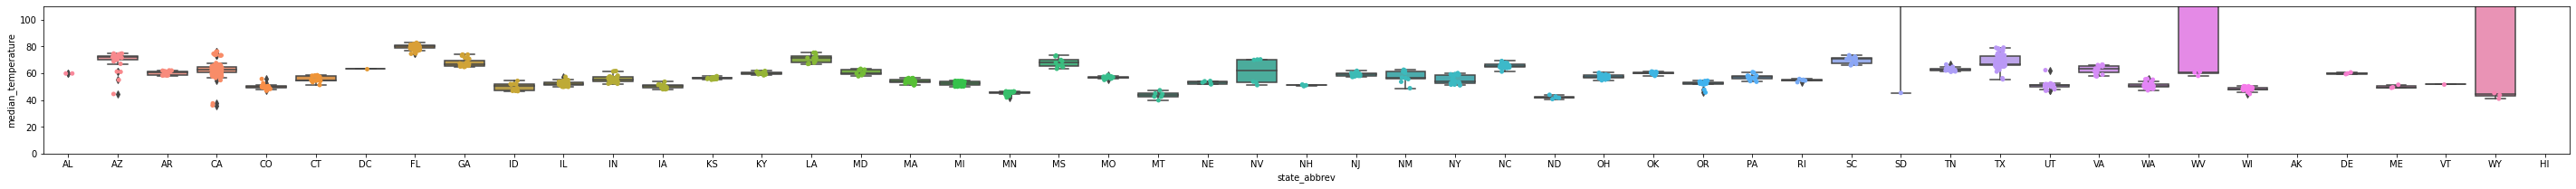

In [47]:
plt.figure(figsize=(50,3))
plt.ylim([0,110])
sns.stripplot(x='state_abbrev', y='median_temperature', data=df);
sns.boxplot(x='state_abbrev', y='median_temperature', data=df);

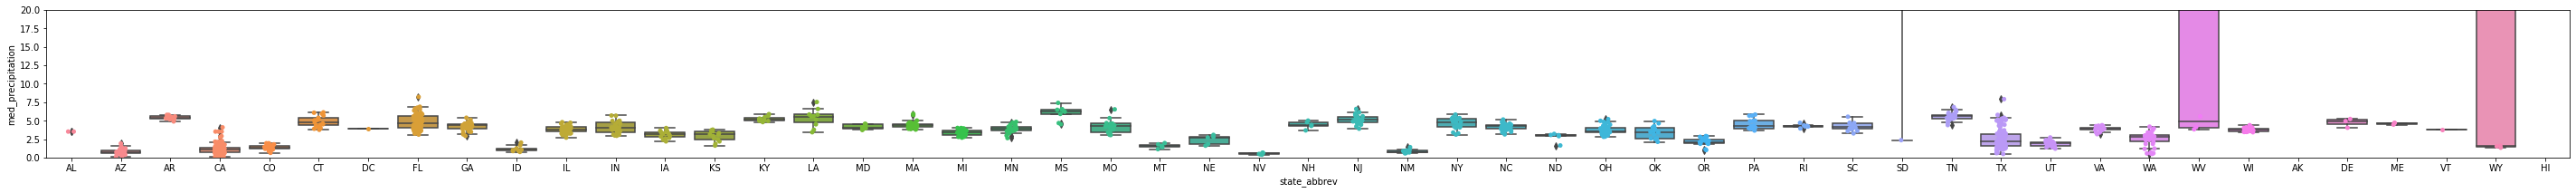

In [48]:
plt.figure(figsize=(50,3))
plt.ylim([0,20])
sns.stripplot(x='state_abbrev', y='med_precipitation', data=df);
sns.boxplot(x='state_abbrev', y='med_precipitation', data=df);

found some outliers in the features that where extracted... i'll try to do some modeling and also normalizing the data, this will be an unsupervised learning task since i will create a recommender model.

In [49]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


In [51]:
!pip install category-encoders

In [52]:
df.columns

Index(['city_id', 'city', 'state', 'state_abbrev', 'pop', 'age', 'household',
       'individual', 'house', 'rent', 'COLI', 'pop_hist', 'ziplist',
       'pop_density', 'timezone', 'counties', 'density_mi_km_sqared',
       'wiki_img_url', 'FIPS', 'GNIS', 'website', 'latitude', 'longitude',
       'jhcovid', 'home_hist', 'lat', 'lon', 'coord_pair', 'weather_hist',
       'income_hist', 'ACA_status', 'median_temperature', 'med_precipitation'],
      dtype='object')

In [53]:
features = ['state_abbrev','pop','household','individual','house','rent','COLI','ACA_status', 'median_temperature','med_precipitation']

In [54]:
x_train = df[features]

In [55]:
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [56]:
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    Normalizer()
)

In [57]:
x_trans = pipeline.fit_transform(x_train)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [58]:
nbgrs = NearestNeighbors()

In [59]:
nbgrs.fit(x_trans)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [60]:
p = np.matrix(x_trans[0])

In [61]:
nbgrs.kneighbors(p)

(array([[0.        , 0.00882719, 0.00990407, 0.01140075, 0.01274927]]),
 array([[   0,  319,  898,  768, 1250]]))

In [62]:
df.iloc[1250]

city_id                                                              1250
city                                                      West Des Moines
state                                                                Iowa
state_abbrev                                                           IA
pop                                                                 65608
age                                                                  34.9
household                                                           77476
individual                                                          45988
house                                                              248756
rent                                                                  959
COLI                                                                 90.5
pop_hist                {"city":"West Des Moines, Iowa","POP_2010_cens...
ziplist                                                   ['50263-50266']
pop_density                           